In [1]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
#read in fremont bridge bicycle data to data frame
os.chdir('/home/cstring/CSE583/HW1/data/')
df = pd.read_csv('fremont.csv')
df.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,9.0,4.0
1,10/03/2012 01:00:00 AM,6.0,4.0
2,10/03/2012 02:00:00 AM,1.0,1.0
3,10/03/2012 03:00:00 AM,3.0,2.0
4,10/03/2012 04:00:00 AM,1.0,6.0


In [3]:
#display data type for each column

df.dtypes

Date                             object
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [4]:
#create column in data frame for total bike count

df['total bike count'] = df['Fremont Bridge East Sidewalk'] + df['Fremont Bridge West Sidewalk'] 
df['total bike count'].head()

0    13.0
1    10.0
2     2.0
3     5.0
4     7.0
Name: total bike count, dtype: float64

In [5]:
#create column in data frame for hour of the day

df['Date'] = pd.to_datetime(df['Date']) #convert to datetime
df['Hour'] = df['Date'].dt.hour #extract hour
df['Hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: Hour, dtype: int64

In [6]:
#create column in data frame for year

df['Year'] = df['Date'].dt.year #extract hour
df['Year'].head() 

0    2012
1    2012
2    2012
3    2012
4    2012
Name: Year, dtype: int64

In [7]:
#create new data frame for 2016

df = df.set_index(['Date'])
df_2016 = df.loc['2016-1-1':'2016-12-31']
df_2016.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total bike count,Hour,Year
Date,,,,,
2016-01-01 00:00:00,9.0,9.0,18.0,0,2016
2016-01-01 01:00:00,12.0,3.0,15.0,1,2016
2016-01-01 02:00:00,5.0,6.0,11.0,2,2016
2016-01-01 03:00:00,6.0,1.0,7.0,3,2016
2016-01-01 04:00:00,2.0,0.0,2.0,4,2016


Text(0, 0.5, 'Total Bicycle Counts')

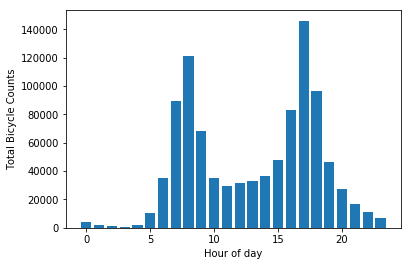

In [10]:
#plot hour of the day vs total bicycle counts for 2016

#group data by hour
df_2016_count = df_2016.groupby(['Hour']).sum()

#plot histogram
fig, ax = plt.subplots()
ax.bar(pd.Series(range(0,24)),df_2016_count['total bike count'])
ax.set_xlabel('Hour of day')
ax.set_ylabel('Total Bicycle Counts')


In [ ]:
#sort values by total bike count to determine what is the busiest hour of the day for 2016
df_2016_mean = df_2016.groupby(['Hour']).mean()
del df_2016_mean['Fremont Bridge East Sidewalk']
del df_2016_mean['Fremont Bridge West Sidewalk']
del df_2016_mean['Year']
df_2016_mean.columns = ['average daily bike count']
df_2016_mean.sort_values(by = ['average daily bike count'], ascending=False)